In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
test_data=pd.read_excel('cleaned_test.xlsx')

In [4]:
train_data=pd.read_excel('cleaned_train.xlsx')

In [5]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Feature selection

In [ ]:
Finding Out the best feature which will have the good relation with target variable
1.heatmap
2.feature importance
3.selectkbest

In [6]:
train_data.shape

(10682, 30)

In [7]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi'],
      dtype='object')

In [12]:
x=train_data.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours,duration_min,Airline_Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
y=train_data.iloc[:,1]

In [15]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

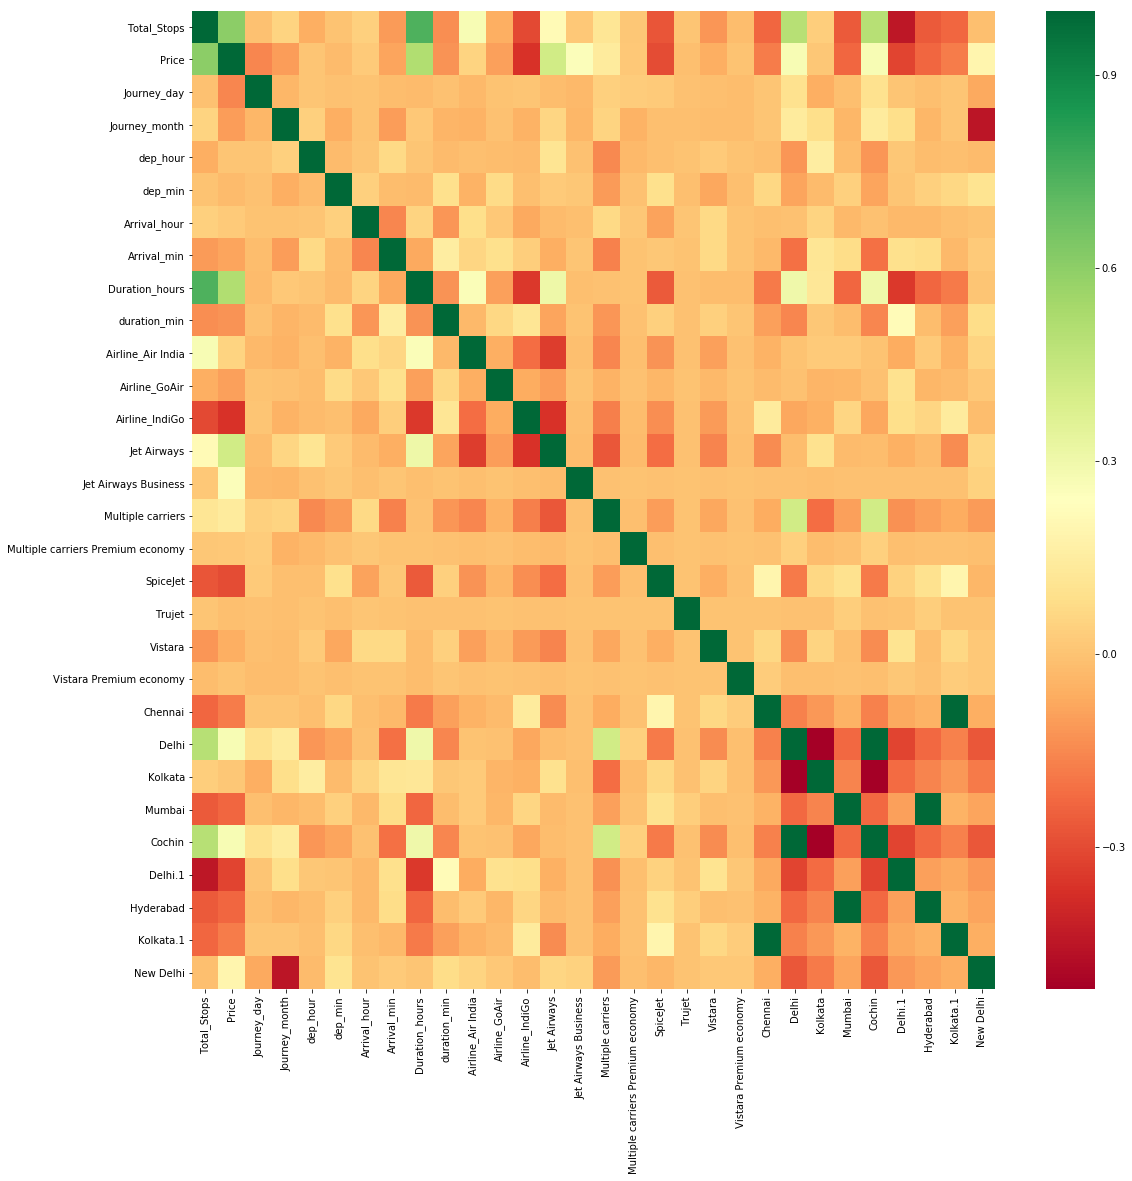

In [18]:
# now lets see the correlation between the independent and dependent variable
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),cmap='RdYlGn')
plt.show()

In [20]:
#now lets just get the important features using the extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [29]:
selection.feature_importances_

array([2.24863409e-01, 1.42398362e-01, 5.47984176e-02, 2.42383802e-02,
       2.14900624e-02, 2.79492309e-02, 1.95348632e-02, 1.30674875e-01,
       1.77527254e-02, 9.13970009e-03, 1.88492134e-03, 1.68001503e-02,
       1.37840814e-01, 6.70695822e-02, 1.95647715e-02, 8.77982619e-04,
       3.25581424e-03, 9.41754516e-05, 5.15565862e-03, 8.23866888e-05,
       4.69490595e-04, 1.19217862e-02, 3.19749690e-03, 5.50462056e-03,
       5.46128417e-03, 1.58442685e-02, 6.55313316e-03, 5.72690693e-04,
       2.50089472e-02])

In [21]:
feat_impo=pd.Series(selection.feature_importances_,index=x.columns)
feat_impo

Total_Stops                          0.224863
Journey_day                          0.142398
Journey_month                        0.054798
dep_hour                             0.024238
dep_min                              0.021490
Arrival_hour                         0.027949
Arrival_min                          0.019535
Duration_hours                       0.130675
duration_min                         0.017753
Airline_Air India                    0.009140
Airline_GoAir                        0.001885
Airline_IndiGo                       0.016800
Jet Airways                          0.137841
Jet Airways Business                 0.067070
Multiple carriers                    0.019565
Multiple carriers Premium economy    0.000878
SpiceJet                             0.003256
Trujet                               0.000094
Vistara                              0.005156
Vistara Premium economy              0.000082
Chennai                              0.000469
Delhi                             

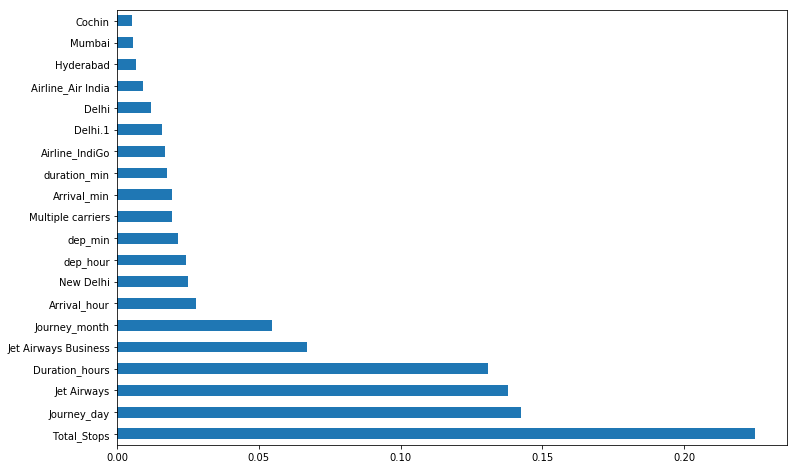

In [22]:
#ploting the importance of feature

plt.figure(figsize=(12,8))
feat_impo=pd.Series(selection.feature_importances_,index=x.columns)
feat_impo.nlargest(20).plot(kind='barh')
plt.show()